In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# load user csv 
userdf = pd.read_csv('users.csv', parse_dates=['yelping_since'])
userdf.head()

,user_id,name,review_count,yelping_since,elite,average_stars
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,"2006,2007,2008,2009,2010,2011,2012,2013,2014",3.85
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",4.09
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,"2010,2011",3.76
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,"2009,2010,2011,2012,2013,2014",3.77
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,"2009,2010,2011",3.72


In [20]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   name           object        
 2   review_count   int64         
 3   yelping_since  datetime64[ns]
 4   elite          object        
 5   average_stars  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 100.2+ MB


In [21]:
userdf.describe()

,review_count,average_stars
count,2.189457e+06,2.189457e+06
mean,2.169772e+01,3.653816e+00
std,7.601255e+01,1.153861e+00
min,0.000000e+00,1.000000e+00
25%,2.000000e+00,3.000000e+00
50%,5.000000e+00,3.880000e+00
75%,1.500000e+01,4.550000e+00
max,1.568600e+04,5.000000e+00


In [22]:
# take a look at users with zero reviews
userdf[userdf.review_count==0]

,user_id,name,review_count,yelping_since,elite,average_stars
244117,ZHwgiHWY4GpCrkpLkCSv4w,Roger,0,2018-11-09 01:09:14,NaN,4.0
556850,kjOJpw968ru-2Z096SfIuQ,Prince,0,2019-11-09 01:39:07,NaN,1.0
816452,Lxm5mEc450gQZZjK0pZ-wA,Sepehr,0,2020-02-04 00:53:46,NaN,5.0
857752,-2-hPtrWnHdtvtp0-utLQg,Hannah,0,2016-02-19 09:02:13,NaN,2.0
892904,kw036JTnO19doz3F1tv7Lg,Charles,0,2018-10-01 04:16:41,NaN,5.0
1179449,-D1Aj0lY_e5F0tsVypwOCw,Alana,0,2014-07-16 19:22:18,NaN,5.0
1381214,CmoK8leNBK0WcNq-fxVvOQ,Cozzy,0,2015-11-30 03:33:02,NaN,5.0
1427838,FeopsMJV5XVHOrvn6SSwCg,Nicole,0,2016-10-09 19:36:13,NaN,5.0
1480513,yw19U3yMo9nvRZwm1bl8ZA,G,0,2017-03-04 20:33:02,NaN,5.0
1498686,dokOlyTmNl3wHmcEukhGVg,Janice,0,2016-05-27 15:50:14,NaN,1.0


In [23]:
# since average stars is given, review count probably at least 1 instead of zero
zerorev = (userdf.review_count==0) # True at indexes where review count is/was zero
# replace zeros with 1
userdf.loc[userdf.review_count==0,'review_count'] = 1 
userdf.loc[zerorev,:]

,user_id,name,review_count,yelping_since,elite,average_stars
244117,ZHwgiHWY4GpCrkpLkCSv4w,Roger,1,2018-11-09 01:09:14,NaN,4.0
556850,kjOJpw968ru-2Z096SfIuQ,Prince,1,2019-11-09 01:39:07,NaN,1.0
816452,Lxm5mEc450gQZZjK0pZ-wA,Sepehr,1,2020-02-04 00:53:46,NaN,5.0
857752,-2-hPtrWnHdtvtp0-utLQg,Hannah,1,2016-02-19 09:02:13,NaN,2.0
892904,kw036JTnO19doz3F1tv7Lg,Charles,1,2018-10-01 04:16:41,NaN,5.0
1179449,-D1Aj0lY_e5F0tsVypwOCw,Alana,1,2014-07-16 19:22:18,NaN,5.0
1381214,CmoK8leNBK0WcNq-fxVvOQ,Cozzy,1,2015-11-30 03:33:02,NaN,5.0
1427838,FeopsMJV5XVHOrvn6SSwCg,Nicole,1,2016-10-09 19:36:13,NaN,5.0
1480513,yw19U3yMo9nvRZwm1bl8ZA,G,1,2017-03-04 20:33:02,NaN,5.0
1498686,dokOlyTmNl3wHmcEukhGVg,Janice,1,2016-05-27 15:50:14,NaN,1.0


In [24]:
print(f'total reviews: {userdf.review_count.sum()}')
print(f'total users: {len(userdf)}')

total reviews: 47506248
total users: 2189457


<AxesSubplot:xlabel='review_count'>

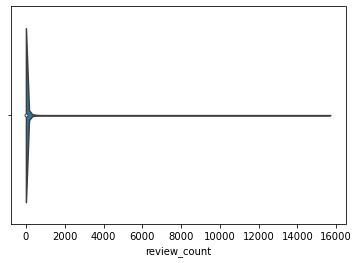

In [25]:
sns.violinplot(x=userdf.review_count)

In [26]:
# add columns 
userdf['start_year']=userdf.yelping_since.dt.year # yelping_since year
userdf['years_member'] = 2022 - userdf.start_year # number years yelp member
userdf['reviews/year'] = userdf.review_count/userdf.years_member # number reviews per year
userdf = userdf.drop('yelping_since', axis=1)
userdf.head()

,user_id,name,review_count,elite,average_stars,start_year,years_member,reviews/year
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,"2006,2007,2008,2009,2010,2011,2012,2013,2014",3.85,2005,17,71.764706
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...",4.09,2007,15,142.400000
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,"2010,2011",3.76,2007,15,7.933333
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,"2009,2010,2011,2012,2013,2014",3.77,2009,13,75.923077
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,"2009,2010,2011",3.72,2008,14,35.357143


Text(0.5, 0, 'log(review_count)')

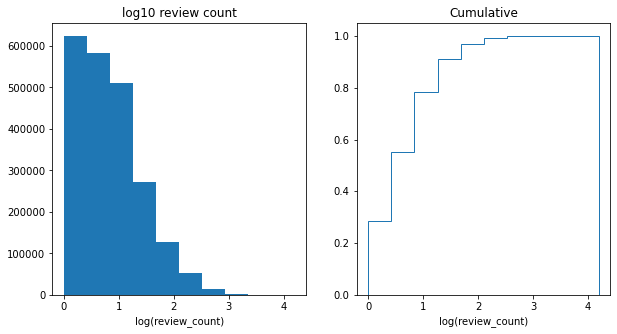

In [27]:
# look at distribution of review count
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].hist(np.log10(userdf['review_count']))
axs[0].set_title('log10 review count')
axs[0].set_xlabel('log(review_count)')
#axs[0].hist(userdf['review_count'], histtype='step', density=True, cumulative=True)
axs[1].hist(np.log10(userdf['review_count']), histtype='step', density=True, cumulative=True)
axs[1].set_title('Cumulative')
axs[1].set_xlabel('log(review_count)')

Text(0.5, 1.0, 'Users with One Review: \n Distribution of Rating')

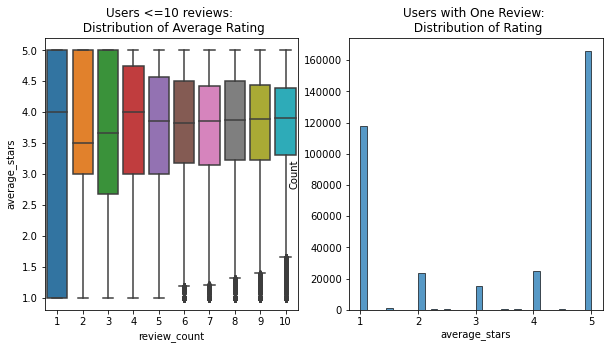

In [28]:
# almost 60% of people have 10 reviews or less
fig, axs = plt.subplots(1,2, figsize=(10,5))
#sns.scatterplot(x=userdf['review_count'], y=userdf['average_stars'], ax=axs[0])
fewrev = (userdf['review_count'] <=10)
sns.boxplot(x=userdf.loc[fewrev,'review_count'], y=userdf.loc[fewrev,'average_stars'], ax=axs[0])
axs[0].set_title('Users <=10 reviews: \n Distribution of Average Rating')
sns.histplot(x=userdf.loc[userdf['review_count']==1,'average_stars'], ax=axs[1])
axs[1].set_title('Users with One Review: \n Distribution of Rating')
#axs[2].hist(x=userdf.loc[userdf['review_count']==1,'average_stars'], histtype='step', density=True, cumulative=True)


In [29]:
# why do people start yelping? generally to share a really good or bad experience
# ~50% of users with one review rate the business 4+ stars
# ~25% rate business 1 star
# minority of people only review to share bad experiences (average rating less than 2 stars even as review count increases)

Text(0.5, 0, 'log10(Reviews/Year)')

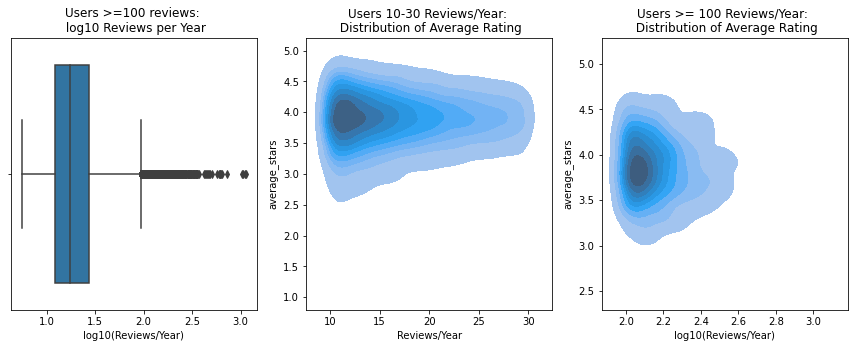

In [30]:
# small fraction of users have 100+ reviews
fig, axs = plt.subplots(1,3, figsize=(15,5))
#sns.scatterplot(x=userdf['review_count'], y=userdf['average_stars'], ax=axs[0])
manyrev = (userdf['review_count'] >=100)
manyrevperyr = np.log10(userdf.loc[manyrev,'reviews/year'])

sns.boxplot(x=manyrevperyr, ax=axs[0])
axs[0].set_title('Users >=100 reviews: \n log10 Reviews per Year')
axs[0].set_xlabel('log10(Reviews/Year)')

# active users
activeuser = (userdf['reviews/year']>=10) & (userdf['reviews/year']<=30)
sns.kdeplot(x=userdf.loc[activeuser,'reviews/year'], y=userdf.loc[activeuser,'average_stars'], fill=True, ax=axs[1])
axs[1].set_title('Users 10-30 Reviews/Year: \n Distribution of Average Rating')
axs[1].set_xlabel('Reviews/Year')

# possible bots/fake reviewers
botrevperyr = userdf['reviews/year']>=100
sns.kdeplot(x=np.log10(userdf.loc[botrevperyr,'reviews/year']), y=userdf.loc[botrevperyr,'average_stars'], fill=True, ax=axs[2])
axs[2].set_title('Users >= 100 Reviews/Year: \n Distribution of Average Rating')
axs[2].set_xlabel('log10(Reviews/Year)')

In [31]:
# summary of active users with 10-30 reviews/year
userdf[activeuser].describe()

,review_count,average_stars,start_year,years_member,reviews/year
count,77229.000000,77229.000000,77229.000000,77229.000000,77229.000000
mean,159.684976,3.863246,2012.314493,9.685507,16.434891
std,75.961608,0.443539,3.102431,3.102431,5.308307
min,10.000000,1.000000,2004.000000,1.000000,10.000000
25%,105.000000,3.620000,2010.000000,7.000000,12.000000
50%,145.000000,3.890000,2012.000000,10.000000,15.000000
75%,200.000000,4.160000,2015.000000,12.000000,19.916667
max,518.000000,5.000000,2021.000000,18.000000,30.000000


In [32]:
# summary of potential bots/fake reviewers with >=100 reviews/year
userdf[botrevperyr].describe()

,review_count,average_stars,start_year,years_member,reviews/year
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,1640.419847,3.859344,2011.223664,10.776336,151.958436
std,1103.924251,0.314628,3.168970,3.168970,82.622803
min,227.000000,2.580000,2004.000000,2.000000,100.000000
25%,1117.000000,3.650000,2009.000000,9.000000,111.238095
50%,1463.000000,3.840000,2011.000000,11.000000,129.607692
75%,1866.750000,4.070000,2013.000000,13.000000,162.340909
max,15686.000000,5.000000,2020.000000,18.000000,1130.076923


In [ ]:
reviewdf = pd.read_csv('restaurantrev.csv', parse_dates=['date'])
reviewdf.head()

In [ ]:
reviewdf = reviewdf.drop(['review_id'],axis=1)
reviewdf.info()

In [ ]:
# look at reviews of users with >=100 reviews/year
# ~80k reviws only comprise a small fraction of 5.5M restaurant reviews
botrev = reviewdf[reviewdf.user_id.isin(userdf[botrevperyr].user_id)]
print(botrev.info())
botrev.head()

In [ ]:
# active reviwers with 10-30 reviews/year
# almost 1M reviews comprises almost 20% of 5.5M restaurant reviews
activerev = reviewdf[reviewdf.user_id.isin(userdf[activeuser].user_id)]
print(activerev.info())
activerev.head()

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,5))

normrev = reviewdf[reviewdf.user_id.isin(userdf[fewrev].user_id)]
axs[0].hist(x=normrev['stars'])
axs[0].set_title('Rating Distribution:\n Users with <=10 reviews')
axs[0].set_xlabel('Stars')
axs[1].hist(x=activerev['stars'])
axs[1].set_title('Rating Distribution:\n Users with 10-30 reviews/yr')
axs[1].set_xlabel('Stars')
axs[2].hist(x=botrev['stars'])
axs[2].set_title('Rating Distribution:\n Users with >=100 reviews/yr')
axs[2].set_xlabel('Stars')


In [ ]:
restaurantdf = pd.read_csv('restaurants.csv')
# number of potential bots in reviews
print('# unique users with >=100 reviews/year in reviews:', len(botrev.user_id.unique()))

# summary of restaurants reviewed by potential bots
botrest = restaurantdf[restaurantdf.business_id.isin(botrev.business_id)]
botrest.describe()

In [ ]:
# all restaurants
restaurantdf.describe()